# Female Writers of the Victorian Era

Using data obtained from the Circulating Library, we hope to answer the following questions:

1. What proportion of writers of Victorian fiction were women?

2. What proportion of Victorian fiction titles were written by women?

3. What proportion of female writers of Victorian fiction favored a pseudonym?

4. Were there any publishing houses which published mostly women?


### 1. Load and Explore Data

In [191]:
#import relevent packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

In [192]:
id_authors = '1tPv6wT47emMZeHji7lK5xyLYPpCwfjC-'
id_titles = '1lr1jyzmaNLS8XWT_RzOgQg1pgQSA44F5'

download = 'https://drive.google.com/uc?export=download&id='

path_authors = download + id_authors
path_titles = download + id_titles

raw_authors = StringIO(requests.get(path_authors).text)
raw_titles = StringIO(requests.get(path_titles).text)

In [193]:
#read in the authors dataframe
authors = pd.read_csv(raw_authors)

In [194]:
#explore data
authors.head()

,author_id,first_name,middle_name,last_name,alt_name,birth_year,death_year,gender
0,1,NaN,NaN,Anonymous,Anon. (abbreviation),NaN,NaN,U
1,2,Henry,Robert,Addison,NaN,1805.0,1876.0,M
2,3,Hamilton,NaN,AidÃ©,Charles Hamilton AidÃ© (legal name),1826.0,1906.0,M
3,4,Gustave,NaN,Aimard,(pseudonym); Oliver Glaux (legal name),1818.0,1883.0,M
4,5,William,Harrison,Ainsworth,Will Brown (pseudonym),1805.0,1882.0,M


In [195]:
authors.describe().T

,count,mean,std,min,25%,50%,75%,max
author_id,4209.0,2213.025184,1258.614225,1.0,1121.0,2236.0,3303.0,4359.0
birth_year,2729.0,1834.956028,23.459883,1746.0,1818.0,1839.0,1854.0,1893.0
death_year,2682.0,1903.370246,27.935259,1824.0,1883.0,1905.0,1926.0,1973.0


In [196]:
#look at missing values
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
author_id      4209 non-null int64
first_name     4081 non-null object
middle_name    2128 non-null object
last_name      4208 non-null object
alt_name       1591 non-null object
birth_year     2729 non-null float64
death_year     2682 non-null float64
gender         4209 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 263.2+ KB


In [197]:
pseudonym = authors.alt_name.str.contains('pseudonym')
pseudonym.fillna(False, inplace = True)
pseudonym = pd.get_dummies(pseudonym, drop_first = True)
authors['pseudonym'] = pseudonym

In [198]:
#read in titles dataframe
titles = pd.read_csv(raw_titles)

In [199]:
#explore data
titles.head()

,title_id,author_id,title,volumes,publisher_location,publisher_name,publication_year
0,1,45,"Abbot's Cleve: or, Can It be Proved? A Novel",3,London,Tinsley Brothers,1864
1,2,58,Ada Fortescue: A Novel,3,London,T. C. Newby,1863
2,3,1,Ada Moore's Story: A Novel,3,London,Tinsley Brothers,1867
3,4,2,Behind the Curtain: A Novel,3,London,John Maxwell,1865
4,5,1495,The Agent of Broome Warren: A Novel,3,London,Bentley,1871


In [200]:
titles.describe().T

,count,mean,std,min,25%,50%,75%,max
title_id,19912.0,10057.777722,5790.752696,1.0,5052.75,10074.5,15072.25,20063.0
author_id,19912.0,1694.191894,1341.092502,1.0,444.75,1464.0,2834.00,4359.0
volumes,19912.0,1.647198,0.877985,1.0,1.00,1.0,3.00,4.0
publication_year,19912.0,1879.650713,17.460224,1824.0,1868.00,1884.0,1894.00,1907.0


In [201]:
#look at missing values
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19912 entries, 0 to 19911
Data columns (total 7 columns):
title_id              19912 non-null int64
author_id             19912 non-null int64
title                 19912 non-null object
volumes               19912 non-null int64
publisher_location    19880 non-null object
publisher_name        19910 non-null object
publication_year      19912 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [202]:
df = titles.merge(authors, left_on = 'author_id', right_on = 'author_id')
df.head()

,title_id,author_id,title,volumes,publisher_location,publisher_name,publication_year,first_name,middle_name,last_name,alt_name,birth_year,death_year,gender,pseudonym
0,1,45,"Abbot's Cleve: or, Can It be Proved? A Novel",3,London,Tinsley Brothers,1864,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1
1,107,45,Carleton Grange: A Novel,3,London,Tinsley Brothers,1866,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1
2,319,45,The Heir Expectant,3,London,Hurst and Blackett,1870,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1
3,359,45,Kathleen,3,London,Hurst and Blackett,1869,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1
4,576,45,Raymond's Heroine,3,London,Hurst and Blackett,1867,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1


In [203]:
df['female'] = (df.gender == 'F')

In [204]:
df.head()

,title_id,author_id,title,volumes,publisher_location,publisher_name,publication_year,first_name,middle_name,last_name,alt_name,birth_year,death_year,gender,pseudonym,female
0,1,45,"Abbot's Cleve: or, Can It be Proved? A Novel",3,London,Tinsley Brothers,1864,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1,True
1,107,45,Carleton Grange: A Novel,3,London,Tinsley Brothers,1866,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1,True
2,319,45,The Heir Expectant,3,London,Hurst and Blackett,1870,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1,True
3,359,45,Kathleen,3,London,Hurst and Blackett,1869,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1,True
4,576,45,Raymond's Heroine,3,London,Hurst and Blackett,1867,Isabella,Neil,Harwood,Ross Neil (pseudonym),1837.0,1888.0,F,1,True


### 2. Proportion of Women in Victorian Fiction

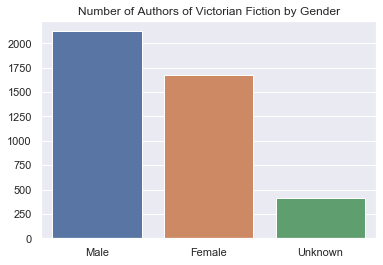

In [205]:
sns.set()
genders = ['Male', 'Female', 'Unknown']
counts = np.array(authors.gender.value_counts())
sns.barplot(genders, counts)
plt.title('Number of Authors of Victorian Fiction by Gender')
plt.show()

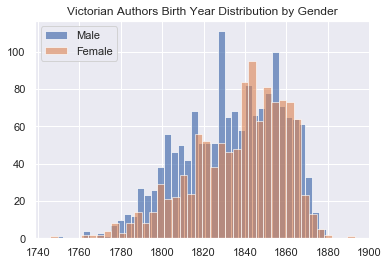

In [206]:
plt.hist(authors.loc[authors.gender == 'M', 'birth_year'].dropna(), bins = 40, alpha = 0.7, label = 'Male')
plt.hist(authors.loc[authors.gender == 'F', 'birth_year'].dropna(), bins = 40, alpha = 0.6, label = 'Female')
plt.legend(loc = 'upper left')
plt.title('Victorian Authors Birth Year Distribution by Gender')
plt.show()

We may observe from the top graph above that overall, there were far more male authors than female authors of victorian fiction. However, the lower graph indicates that over time more and more women became writers of Victorian fiction. We see that towards the end of the era, there were more female writers than male. Further, we see that the number of female authors born each year increases in an exponential manner. This could indicate the gradual opening up of the profession to women over time.

### 3. Proportion of Titles Written by Women

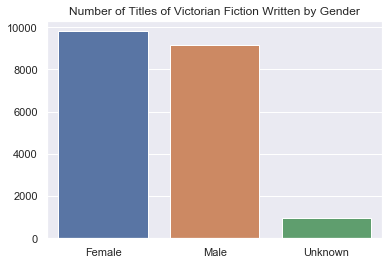

In [207]:
genders = ['Female', 'Male', 'Unknown']
counts = np.array(df.gender.value_counts())
sns.barplot(genders, counts)
plt.title('Number of Titles of Victorian Fiction Written by Gender')
plt.show()

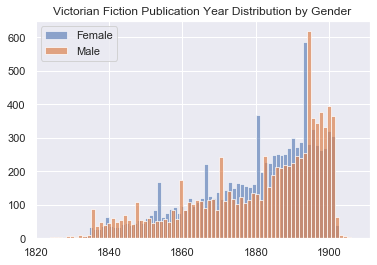

In [208]:
plt.hist(df.loc[df.gender == 'F', 'publication_year'].dropna(), bins = 75, alpha = 0.6, label = 'Female')
plt.hist(df.loc[df.gender == 'M', 'publication_year'].dropna(), bins = 75, alpha = 0.7, label = 'Male')
plt.legend(loc = 'upper left')
plt.title('Victorian Fiction Publication Year Distribution by Gender')
plt.show()

Above, we see that, although there were fewer female authors of Victorian fiction, women collectively wrote a larger share of the literature than their male counterparts. The second graph is even more interesting as it shows that nearly every year, more titles were published by women than by men, except for in the last few years of the era. This is interesting as the previous charts showed that the number of female authors exceeded the number of male authors by the end. This seems to imply that those early female authors were the most prolific of their cohort, while the later authors did not publish as frequently.

### 4. Pseudonyms

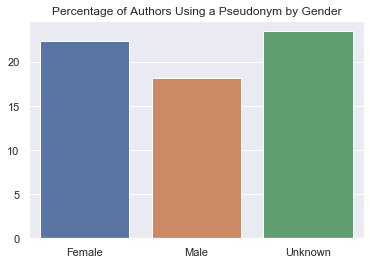

In [209]:
pseudonym_author = np.array(authors.groupby('gender').sum()['pseudonym'])
counts = [1670,2122,417]
sns.barplot(['Female', 'Male', 'Unknown'], np.round(100*pseudonym_author/counts,2))
plt.title('Percentage of Authors Using a Pseudonym by Gender')
plt.show()

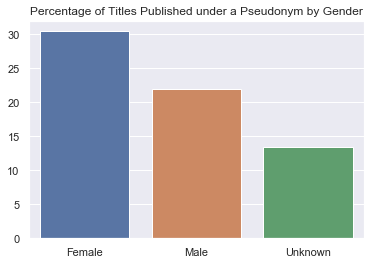

In [210]:
pseudonym_title = np.array(df.groupby('gender').sum()['pseudonym'])
counts = np.array(df.gender.value_counts())
sns.barplot(['Female', 'Male', 'Unknown'], np.round(100*pseudonym_title/counts,2))
plt.title('Percentage of Titles Published under a Pseudonym by Gender')
plt.show()

Knowing that for most of the era of Victorian literature, there were more men than women in writing, we might suspect that women might feel pressured to publish under a male pseudonym. The chart above shows that not only did more female authors publish under a pseudonym than male authors, but larger percentage of the titles by female authors were published under pseudonyms. This suggests that the more prolific female authors were more likely to publish under a pseudonym.

### 5. Publishing Houses

In [211]:
print('Number of Unique Publishing Companies: ')
print(len(df.publisher_name.unique()))

Number of Unique Publishing Companies: 
621


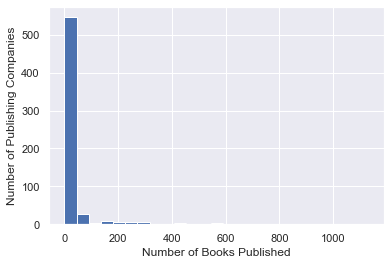

In [212]:
plt.hist(df.publisher_name.value_counts(), bins = 25)
plt.xlabel('Number of Books Published')
plt.ylabel('Number of Publishing Companies')
plt.show()

In [213]:
print('Number of Companies which Published More Than 100 Titles: ')
print(sum(df.publisher_name.value_counts()>100))

Number of Companies which Published More Than 100 Titles: 
45


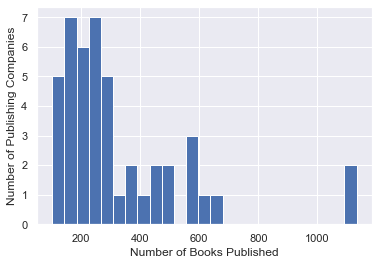

In [214]:
plt.hist(df.publisher_name.value_counts().head(45), bins = 25)
plt.xlabel('Number of Books Published')
plt.ylabel('Number of Publishing Companies')
plt.show()

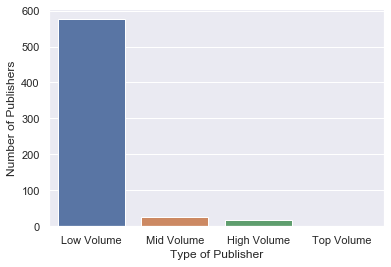

In [215]:
low_level_num = 621 - sum(df.publisher_name.value_counts()>100)
mid_level_num = 621 - sum(df.publisher_name.value_counts()>300) - low_level_num
high_level_num = 621 - sum(df.publisher_name.value_counts()>1000) - mid_level_num - low_level_num
top_level_num = sum(df.publisher_name.value_counts()>1000)
sns.barplot(['Low Volume', 'Mid Volume', 'High Volume', 'Top Volume'], 
            [low_level_num, mid_level_num, high_level_num, top_level_num])
plt.xlabel('Type of Publisher')
plt.ylabel('Number of Publishers')
plt.show()

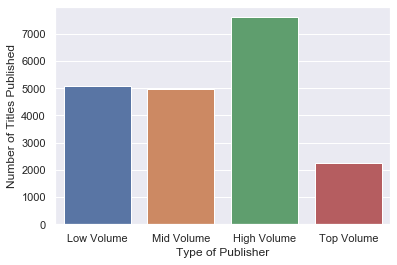

In [216]:
low_level_volume = sum(df.publisher_name.value_counts()[621 - low_level_num:])
mid_level_volume = sum(df.publisher_name.value_counts()[high_level_num + top_level_num:621 - low_level_num])
high_level_volume = sum(df.publisher_name.value_counts()[top_level_num: top_level_num + high_level_num])
top_level_volume = sum(df.publisher_name.value_counts()[:top_level_num])
sns.barplot(['Low Volume', 'Mid Volume', 'High Volume', 'Top Volume'], 
            [low_level_volume, mid_level_volume, high_level_volume, top_level_volume])
plt.xlabel('Type of Publisher')
plt.ylabel('Number of Titles Published')
plt.show()

Here, we attempt to cluster the 621 publishing houses into groups depending on the number of titles they published. The top graph shows the overall histogram, indicating that most publishers put into print very few titles. After the 100 mark, the histogram bars become vanishingly small. This group of publishers with under 100 titles to their name becomes our low volume group. The second graph gives us a better idea of the remainder of the distribution. There appears to be a larger cohort publishing between 150 and 300 titles, a smaller cluster publishing between 300 and 700 titles apeice, and an elite pair which publish over 1000 titles each. These form our mid-volume, high-volume, and top-volume groups respectively. The third graph above shows the number of publishers in each group, and the final graph indicates the number of titles published by each group.

In [217]:
publishers = list(df.publisher_name.value_counts().keys())
low_volume_publishers = publishers[621 - low_level_num:]
mid_volume_publishers = publishers[high_level_num + top_level_num:621 - low_level_num]
high_volume_publishers = publishers[top_level_num: top_level_num + high_level_num]
top_volume_publishers = publishers[:top_level_num]

In [218]:
female_counts_low = []
total_counts_low = []
for index, publisher in enumerate(low_volume_publishers):
    count = 0
    IDs = df.loc[df.publisher_name == publisher, 'author_id'].unique()
    total_counts_low.append(len(IDs))
    for ID in IDs:
        if (authors.loc[authors.author_id == ID, 'gender'] == 'F').iloc[0]:
            count += 1
    female_counts_low.append(count)

In [219]:
proportion_low = np.array(female_counts_low) / np.array(total_counts_low)

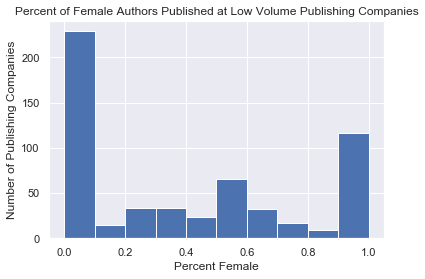

In [220]:
plt.hist(proportion_low)
plt.xlabel('Percent Female')
plt.ylabel('Number of Publishing Companies')
plt.title('Percent of Female Authors Published at Low Volume Publishing Companies')
plt.show()

In [221]:
female_counts_mid = []
total_counts_mid = []
for index, publisher in enumerate(mid_volume_publishers):
    count = 0
    IDs = df.loc[df.publisher_name == publisher, 'author_id'].unique()
    total_counts_mid.append(len(IDs))
    for ID in IDs:
        if (authors.loc[authors.author_id == ID, 'gender'] == 'F').iloc[0]:
            count += 1
    female_counts_mid.append(count)

In [222]:
proportion_mid = np.array(female_counts_mid) / np.array(total_counts_mid)

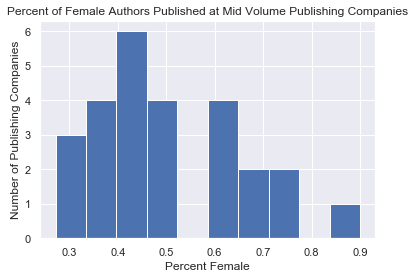

In [223]:
plt.hist(proportion_mid)
plt.xlabel('Percent Female')
plt.ylabel('Number of Publishing Companies')
plt.title('Percent of Female Authors Published at Mid Volume Publishing Companies')
plt.show()

In [224]:
female_counts_high = []
total_counts_high = []
for index, publisher in enumerate(high_volume_publishers):
    count = 0
    IDs = df.loc[df.publisher_name == publisher, 'author_id'].unique()
    total_counts_high.append(len(IDs))
    for ID in IDs:
        if (authors.loc[authors.author_id == ID, 'gender'] == 'F').iloc[0]:
            count += 1
    female_counts_high.append(count)

In [225]:
proportion_high = np.array(female_counts_high) / np.array(total_counts_high)

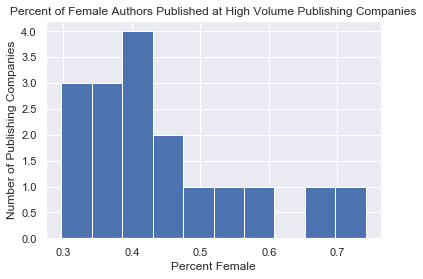

In [226]:
plt.hist(proportion_high)
plt.xlabel('Percent Female')
plt.ylabel('Number of Publishing Companies')
plt.title('Percent of Female Authors Published at High Volume Publishing Companies')
plt.show()

In [227]:
female_counts_top = []
total_counts_top = []
for index, publisher in enumerate(top_volume_publishers):
    count = 0
    IDs = df.loc[df.publisher_name == publisher, 'author_id'].unique()
    total_counts_top.append(len(IDs))
    for ID in IDs:
        if (authors.loc[authors.author_id == ID, 'gender'] == 'F').iloc[0]:
            count += 1
    female_counts_top.append(count)

In [228]:
proportion_top = np.array(female_counts_top) / np.array(total_counts_top)

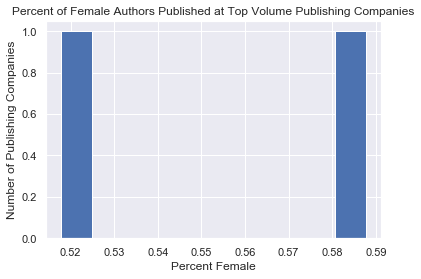

In [229]:
plt.hist(proportion_top)
plt.xlabel('Percent Female')
plt.ylabel('Number of Publishing Companies')
plt.title('Percent of Female Authors Published at Top Volume Publishing Companies')
plt.show()

These final graphs show a histogram of the proportion of female authors to total authors at each company, broken up by volume-tier. As we can see, in each graph, the distribution skews heavily to the left, indicating that companies were much more likely to publish male authors than female authors. The exception to this appears to be the top tier publishers, both of whom have over 50% female authors, which may help explain why they were able to publish so many titles.